# E-Commerce projecct - Clustering / Grouping / Segmentation

### K-Means / Hierarchical / DBSCAN 

### ABSTRACT :
In this project, we will analyze and segment the customers of an e-commerce company by using the RFM approach.
This will enable the e-commerce company to optimize their retention and acquisition strategies. 

### OBJECTIVE : 
Build an unsupervised learning model which can enable your company to analyze their customers via RFM (Recency, Frequency and Monetary value) approach.

### Market Outlook: 
E-commerce stores which became success stories were successful in targeting the desired customers. 
One of the techniques by which they were able to achieve this was customer segmentation i.e. by segmenting the existing customers based on 
frequency of purchases, monetary value etc. E-commerce stores who designed market strategies based on mass marketing soon realized the 
need of customer segmentation as an alternative to save cost and efforts in the digital sphere. In a real-world segmentation scenario, 
there might be hundreds of variables which can be used but broadly they segment the customers by the following characteristics:

In [149]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [150]:
# Load the data
df = pd.read_csv('E-com_Data.csv')
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [151]:
6*321

1926

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [153]:
df.duplicated().sum()

3145

In [154]:
df = df.drop_duplicates(ignore_index=True)

In [155]:
541116 - 3145

537971

In [156]:
df.duplicated().sum()

0

In [157]:
df.shape

(537971, 12)

In [158]:
df.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [159]:
# Required feature to build segmentation/clustering
# To make cluster basis RFM approach
# 'CustomerID', 'InvoieNo', 'Date of purchase','Price'
# recency - 'Date of purchase'
# frequency - 'InvoieNo'
# monetry - 'Price

In [160]:
df.isnull().sum()/len(df)*100

CustomerID            24.869370
Item Code              0.000186
InvoieNo               0.000186
Date of purchase       0.000186
Quantity               0.000186
Time                   0.000186
price per Unit         0.000186
Price                  0.000186
Shipping Location      0.000186
Cancelled_status      98.448801
Reason of return      99.999442
Sold as set          100.000000
dtype: float64

In [161]:
df = df[['CustomerID', 'InvoieNo', 'Date of purchase','Price']]
df.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [162]:
df.isnull().sum()/len(df)*100

CustomerID          24.869370
InvoieNo             0.000186
Date of purchase     0.000186
Price                0.000186
dtype: float64

In [163]:
df = df.dropna(subset=['CustomerID'])
df.isnull().sum()

CustomerID          0
InvoieNo            0
Date of purchase    0
Price               0
dtype: int64

In [164]:
df.shape

(404181, 4)

In [165]:
df.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [166]:
# How many unique customer we have
df['CustomerID'].nunique()

4349

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404181 entries, 0 to 537940
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CustomerID        404181 non-null  float64
 1   InvoieNo          404181 non-null  float64
 2   Date of purchase  404181 non-null  object 
 3   Price             404181 non-null  float64
dtypes: float64(3), object(1)
memory usage: 15.4+ MB


In [168]:
df['Date of purchase'] = pd.to_datetime(df['Date of purchase'])

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404181 entries, 0 to 537940
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   CustomerID        404181 non-null  float64       
 1   InvoieNo          404181 non-null  float64       
 2   Date of purchase  404181 non-null  datetime64[ns]
 3   Price             404181 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 15.4 MB


In [170]:
df = df.rename(columns = {'InvoieNo':'Invoice_No', 'Date of purchase': 'Date'})

In [171]:
df.head()

,CustomerID,Invoice_No,Date,Price
0,4355.0,398177.0,2017-10-29,1926.0
1,4352.0,394422.0,2017-10-05,1740.0
2,4352.0,394422.0,2017-10-12,1866.0
3,4352.0,388633.0,2017-08-22,1869.0
4,4352.0,394422.0,2017-10-10,1888.0


In [172]:
df['Date'].describe()

count                           404181
mean     2017-07-15 15:28:28.388073472
min                2016-12-02 00:00:00
25%                2017-04-12 00:00:00
50%                2017-08-05 00:00:00
75%                2017-10-26 00:00:00
max                2017-12-19 00:00:00
Name: Date, dtype: object

In [173]:
import datetime
new_date = datetime.datetime(2017, 12, 20)
new_date

datetime.datetime(2017, 12, 20, 0, 0)

In [174]:
RFMApproach = df.groupby('CustomerID').agg({'Date': lambda x: (new_date-x.max()).days,
                                            'Invoice_No': lambda x: x.count(),
                                            'Price': lambda x: x.sum()})

RFMApproach.rename(columns = {'Date':'Recency', 'Invoice_No':'Frequency', 
                              'Price':'Monetory'}, inplace=True)

RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetory
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,84,151822.0
...,...,...,...,...
4344,4368.0,278,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,9,13,24962.0
4347,4371.0,4,754,280608.0


In [175]:
RFMApproach.describe()

,Recency,Frequency,Monetory
count,4349.000000,4349.000000,4.349000e+03
mean,93.299379,92.936537,2.299380e+05
std,100.701315,232.086935,8.572589e+05
min,1.000000,1.000000,-5.037200e+04
25%,18.000000,17.000000,3.814800e+04
50%,51.000000,42.000000,8.365500e+04
75%,144.000000,101.000000,2.056120e+05
max,381.000000,7970.000000,3.553619e+07


In [176]:
RFMApproach.quantile(0.75)

Recency         144.0
Frequency       101.0
Monetory     205612.0
Name: 0.75, dtype: float64

In [177]:
# Using Quantile Method to make cluster basis RFM approach
quantiles = RFMApproach.quantile(q=[0.25, 0.50, 0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetory': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [178]:
def Recency_value(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <=d[p][0.75]:
        return 3
    else:
        return 4

In [179]:
def Freq_Monetory_value(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <=d[p][0.75]:
        return 2
    else:
        return 1

In [180]:
RFMApproach.columns

Index(['Recency', 'Frequency', 'Monetory'], dtype='object')

In [181]:
RFMApproach['R'] = RFMApproach['Recency'].apply(Recency_value, args=('Recency',quantiles))
RFMApproach['F'] = RFMApproach['Frequency'].apply(Freq_Monetory_value, args=('Frequency',quantiles))
RFMApproach['M'] = RFMApproach['Monetory'].apply(Freq_Monetory_value, args=('Monetory',quantiles))

In [182]:
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M
0,2.0,4,182,553704.0,1,1,1
1,3.0,77,27,257404.0,3,3,1
2,4.0,19,72,176613.0,2,2,2
3,5.0,311,16,41976.0,4,4,3
4,6.0,37,84,151822.0,2,2,2
...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,4,4,4
4345,4369.0,181,7,10774.0,4,4,4
4346,4370.0,9,13,24962.0,1,4,4
4347,4371.0,4,754,280608.0,1,1,1


In [183]:
RFMApproach['RFM'] = RFMApproach[['R','F','M']].sum(axis=1)
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM
0,2.0,4,182,553704.0,1,1,1,3
1,3.0,77,27,257404.0,3,3,1,7
2,4.0,19,72,176613.0,2,2,2,6
3,5.0,311,16,41976.0,4,4,3,11
4,6.0,37,84,151822.0,2,2,2,6
...,...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,4,4,4,12
4345,4369.0,181,7,10774.0,4,4,4,12
4346,4370.0,9,13,24962.0,1,4,4,9
4347,4371.0,4,754,280608.0,1,1,1,3


In [184]:
RFMApproach['RFM'].nunique()

10

In [185]:
Loyality_Level = ['Platinum','Gold','Silver','Bronze']
score_cuts = pd.qcut(RFMApproach.RFM, q=4, labels = Loyality_Level)
RFMApproach['Loyality_Level'] = score_cuts.values
RFMApproach = RFMApproach.reset_index()
RFMApproach

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,Loyality_Level
0,2.0,4,182,553704.0,1,1,1,3,Platinum
1,3.0,77,27,257404.0,3,3,1,7,Gold
2,4.0,19,72,176613.0,2,2,2,6,Gold
3,5.0,311,16,41976.0,4,4,3,11,Bronze
4,6.0,37,84,151822.0,2,2,2,6,Gold
...,...,...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,4,4,4,12,Bronze
4345,4369.0,181,7,10774.0,4,4,4,12,Bronze
4346,4370.0,9,13,24962.0,1,4,4,9,Silver
4347,4371.0,4,754,280608.0,1,1,1,3,Platinum


In [186]:
RFMApproach.to_csv('Final_Segmentation.csv')

# Visualization for presentation purpose

In [187]:
RFMApproach.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetory', 'R', 'F', 'M', 'RFM',
       'Loyality_Level'],
      dtype='object')

In [188]:
final_report = RFMApproach.groupby('Loyality_Level')[['Recency', 'Frequency', 'Monetory','CustomerID']].agg({
    'Recency':'sum', 'Frequency':'sum', 'Monetory':'sum','CustomerID':'nunique'}).reset_index()
final_report

,Loyality_Level,Recency,Frequency,Monetory,CustomerID
0,Platinum,25988,295781,764912338.0,1281
1,Gold,84082,76027,166230918.0,1313
2,Silver,121757,23778,50300946.1,965
3,Bronze,173932,8595,18556145.0,790


In [189]:
final_report = final_report.rename(columns = {'CustomerID':'NumBuyers'})
final_report['Percent'] = round(final_report['NumBuyers']/final_report.NumBuyers.sum()*100,2)
final_report

,Loyality_Level,Recency,Frequency,Monetory,NumBuyers,Percent
0,Platinum,25988,295781,764912338.0,1281,29.46
1,Gold,84082,76027,166230918.0,1313,30.19
2,Silver,121757,23778,50300946.1,965,22.19
3,Bronze,173932,8595,18556145.0,790,18.17


In [190]:
final_report = final_report[['Loyality_Level','NumBuyers','Percent']]
final_report

,Loyality_Level,NumBuyers,Percent
0,Platinum,1281,29.46
1,Gold,1313,30.19
2,Silver,965,22.19
3,Bronze,790,18.17


In [191]:
!pip install squarify

In [192]:
import squarify

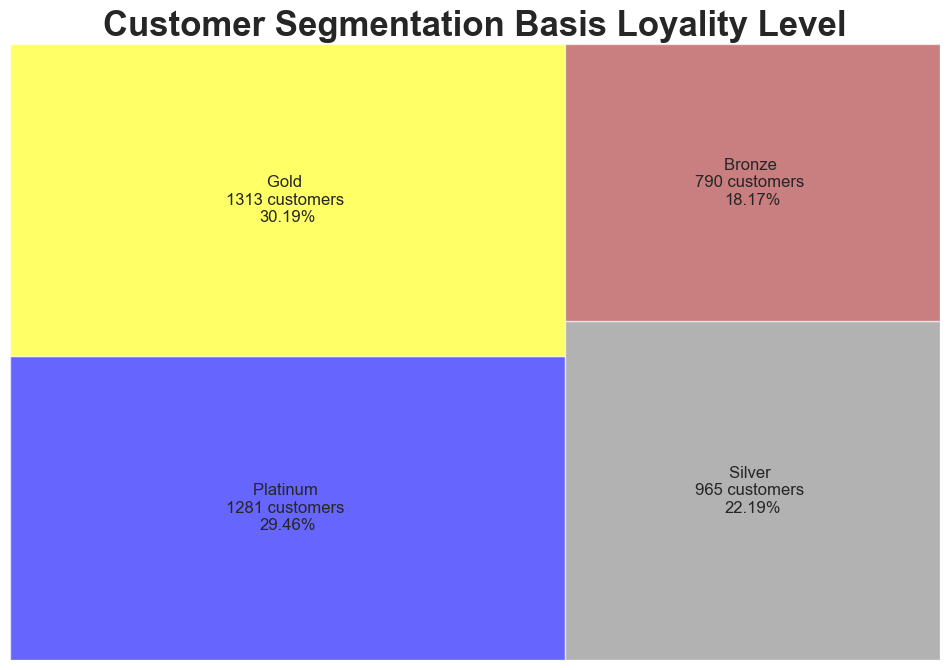

In [193]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12,8)
colors_dict = {'Platinum':'blue', 'Gold':'yellow','Silver':'gray', 'Bronze':'brown'}
squarify.plot(sizes = final_report['NumBuyers'], color = colors_dict.values(),
              label = ['{} \n{:0.0f} customers \n{}%'.format(*final_report.iloc[i]) 
                       for i in range(0, len(final_report))], alpha=0.6)

plt.title("Customer Segmentation Basis Loyality Level", fontsize=25, fontweight ='bold')
plt.axis('off')
plt.show()                       

In [194]:
# Building clustering - another method

In [195]:
RFMApproach.head()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,Loyality_Level
0,2.0,4,182,553704.0,1,1,1,3,Platinum
1,3.0,77,27,257404.0,3,3,1,7,Gold
2,4.0,19,72,176613.0,2,2,2,6,Gold
3,5.0,311,16,41976.0,4,4,3,11,Bronze
4,6.0,37,84,151822.0,2,2,2,6,Gold


In [196]:
RFMApproach.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetory', 'R', 'F', 'M', 'RFM',
       'Loyality_Level'],
      dtype='object')

In [197]:
new_data = RFMApproach[['Recency', 'Frequency', 'Monetory']]
new_data.head()

,Recency,Frequency,Monetory
0,4,182,553704.0
1,77,27,257404.0
2,19,72,176613.0
3,311,16,41976.0
4,37,84,151822.0


In [198]:
RFMApproach

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,Loyality_Level
0,2.0,4,182,553704.0,1,1,1,3,Platinum
1,3.0,77,27,257404.0,3,3,1,7,Gold
2,4.0,19,72,176613.0,2,2,2,6,Gold
3,5.0,311,16,41976.0,4,4,3,11,Bronze
4,6.0,37,84,151822.0,2,2,2,6,Gold
...,...,...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,4,4,4,12,Bronze
4345,4369.0,181,7,10774.0,4,4,4,12,Bronze
4346,4370.0,9,13,24962.0,1,4,4,9,Silver
4347,4371.0,4,754,280608.0,1,1,1,3,Platinum


In [199]:
# Implemented below part on own need to check
RFMApproach['Loyality_Level_Encoded'] = RFMApproach['Loyality_Level'].map({'Platinum':0,'Gold':1,'Silver':2,'Bronze':3})
del RFMApproach['Loyality_Level']
RFMApproach.head(2)

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,Loyality_Level_Encoded
0,2.0,4,182,553704.0,1,1,1,3,0
1,3.0,77,27,257404.0,3,3,1,7,1


In [200]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# K-Means Clustering

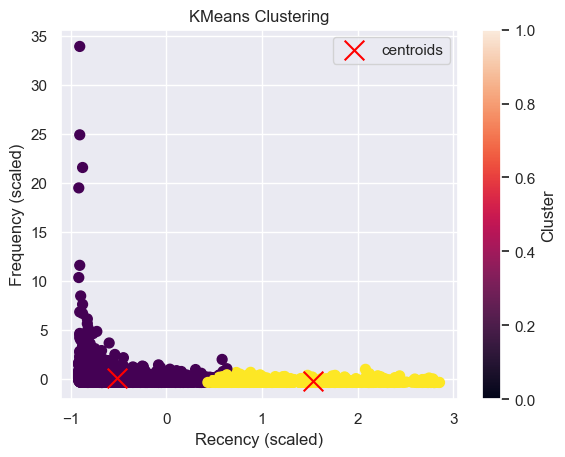

In [201]:

df = pd.DataFrame(RFMApproach)

# Select features for clustering
features = ["Recency", "Frequency", "Monetory"]
X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # Adjust 'n_clusters' as needed
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Print the resulting DataFrame with cluster labels
#print(df)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.scatter(centroids[:,0], centroids[:,1], c ='red', marker='x', s=200, label='centroids')

plt.xlabel("Recency (scaled)")
plt.ylabel("Frequency (scaled)")
plt.title("KMeans Clustering")
plt.colorbar(label="Cluster")
plt.legend()
plt.show()


In [202]:
# Get WCSS (inertia)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", wcss)

Within-Cluster Sum of Squares (WCSS): 9419.941368342072


# Hierarchical Clustering

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


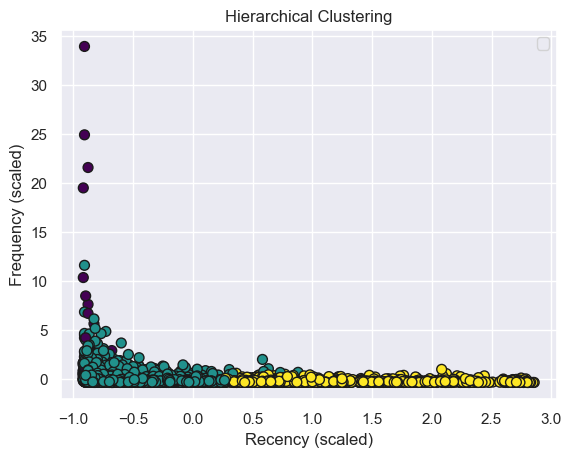

In [203]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=3)
labels_hierarchical = hierarchical.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c = labels_hierarchical, cmap='viridis', s=50, edgecolors='k')
#plt.scatter(centroids[:,0], centroids[:,1], c ='red', marker='x', s=200, label='centroids')
plt.title("Hierarchical Clustering")
plt.xlabel("Recency (scaled)")
plt.ylabel("Frequency (scaled)")
plt.legend()
plt.show()

In [204]:
# Calculate WCSS manually
wcss = 0
for cluster_label in np.unique(labels_hierarchical):
    cluster_points = X_scaled[labels_hierarchical == cluster_label]
    centroid = cluster_points.mean(axis=0)  # Calculate the cluster centroid
    wcss += np.sum((cluster_points - centroid) ** 2)  # Sum of squared distances

print("WCSS for Hierarchical Clustering:", wcss)

WCSS for Hierarchical Clustering: 5554.722981793938


# DBSCAN - Density Based Spatial Clustering of Application with Noise

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


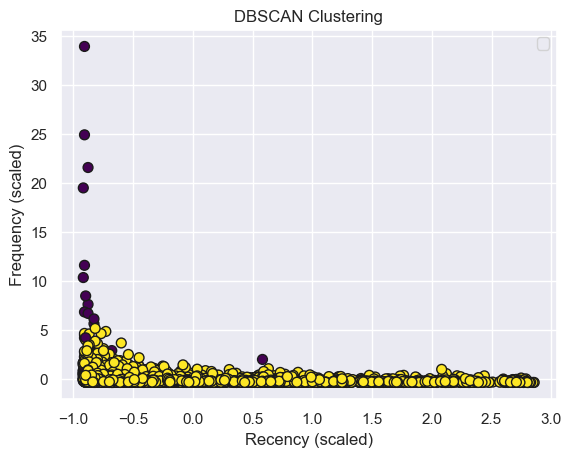

In [205]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.8, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c =labels_dbscan , cmap='viridis', s=50, edgecolors='k')
#plt.scatter(centroids[:,0], centroids[:,1], c ='red', marker='x', s=200, label='centroids')
plt.title("DBSCAN Clustering")
plt.xlabel("Recency (scaled)")
plt.ylabel("Frequency (scaled)")
plt.legend()
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


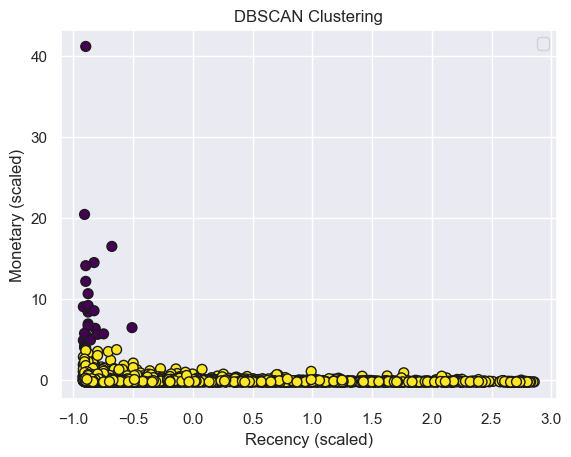

In [206]:
dbscan = DBSCAN(eps = 0.8, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0], X_scaled[:,2], c =labels_dbscan , cmap='viridis', s=50, edgecolors='k')
#plt.scatter(centroids[:,0], centroids[:,1], c ='red', marker='x', s=200, label='centroids')
plt.title("DBSCAN Clustering")
plt.xlabel("Recency (scaled)")
plt.ylabel("Monetary (scaled)")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


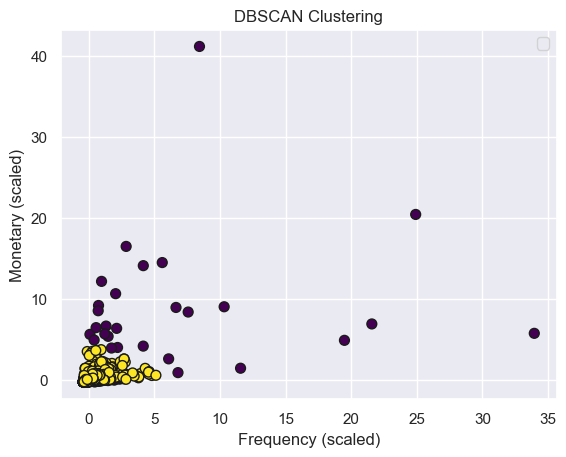

In [207]:
dbscan = DBSCAN(eps = 0.8, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:,1], X_scaled[:,2], c =labels_dbscan , cmap='viridis', s=50, edgecolors='k')
#plt.scatter(centroids[:,0], centroids[:,1], c ='red', marker='x', s=200, label='centroids')
plt.title("DBSCAN Clustering")
plt.xlabel("Frequency (scaled)")
plt.ylabel("Monetary (scaled)")
plt.legend()
plt.show()

In [208]:
# Calculate WCSS manually
wcss = 0
for cluster_label in np.unique(labels_dbscan):
    if cluster_label == -1:  # Skip noise points
        continue
    cluster_points = X_scaled[labels_dbscan == cluster_label]
    centroid = cluster_points.mean(axis=0)  # Calculate the cluster centroid
    wcss += np.sum((cluster_points - centroid) ** 2)  # Sum of squared distances

print("WCSS for DBSCAN:", wcss)

WCSS for DBSCAN: 5934.987895078757


In [209]:
# Lower WCSS is Better:

# A lower WCSS means that the points within each cluster are closer to their centroid, indicating more compact and well-defined clusters.
# However, a very low WCSS might indicate overfitting, especially if you use too many clusters.